Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz


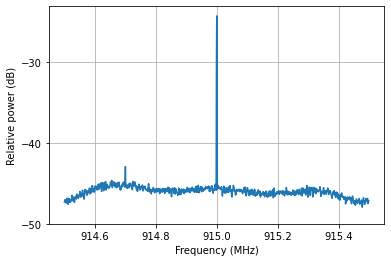

In [2]:
from pylab import *
from rtlsdr import *

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.0e6
sdr.center_freq = 915e6
sdr.gain = 4

samples = sdr.read_samples(256*1024)
sdr.close()

# use matplotlib to estimate and plot the PSD
results = psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()

In [3]:
import time
from tqdm import tqdm
from pylab import *
from rtlsdr import *

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz
100%|██████████| 10000/10000 [03:06<00:00, 53.66it/s]


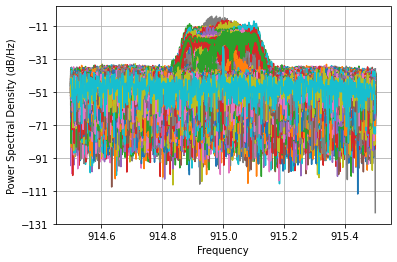

In [15]:

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.0e6
sdr.center_freq = 915e6
sdr.gain = 4

results_list = [[],[]]

for i in tqdm(range(10000)):
    samples = sdr.read_samples()
    # use matplotlib to estimate and plot the PSD
    results = psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
    results_list[0].append(time.time())
    results_list[1].append(10*np.log10(np.mean(results[0][384:641])))


sdr.close()

In [11]:
# from matplotlib.mlab import psd
# sdr = RtlSdr()

# # configure device
# sdr.sample_rate = 1.0e6
# sdr.center_freq = 915e6
# sdr.gain = 4

# results_list = [[],[]]

# samples = sdr.read_samples()
# # use matplotlib to estimate and plot the PSD
# power, psd_frequencies = psd(samples, NFFT=256, Fs=sdr.sample_rate)
# psd_frequencies += sdr.center_freq

# results_psd = [power,psd_frequencies]
# print(results_psd)
# sdr.close()

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz


[array([2.67579907e-12, 1.45107733e-12, 2.70664502e-12, 3.85546459e-12,
       3.90279046e-12, 2.91947111e-12, 1.47175849e-12, 1.38612219e-12,
       1.46919997e-12, 1.24949228e-12, 9.52592568e-13, 1.38025175e-12,
       1.68543335e-12, 7.98731327e-13, 3.04511351e-12, 2.43918763e-12,
       1.13313621e-12, 1.07314833e-12, 2.59290309e-12, 3.31636044e-12,
       2.50199417e-12, 7.11863571e-13, 2.85515912e-12, 5.63746624e-12,
       2.92911040e-12, 3.22307201e-12, 2.53076884e-12, 2.59468518e-12,
       2.61518552e-12, 3.10124982e-12, 4.34743588e-12, 2.02962677e-12,
       2.06109814e-12, 5.11351195e-12, 3.20807133e-12, 2.20311897e-12,
       3.46732667e-12, 3.14917079e-12, 2.85478952e-12, 2.09345166e-12,
       2.25859664e-12, 5.63110117e-12, 4.39978628e-12, 1.70613583e-12,
       5.69754958e-13, 3.09615636e-12, 6.60549349e-12, 5.25890294e-12,
       1.77796699e-12, 2.39274541e-12, 4.75659309e-12, 4.39913592e-12,
       3.15632493e-12, 1.37185590e-12, 2.97994024e-12, 3.25344138e-12,
     

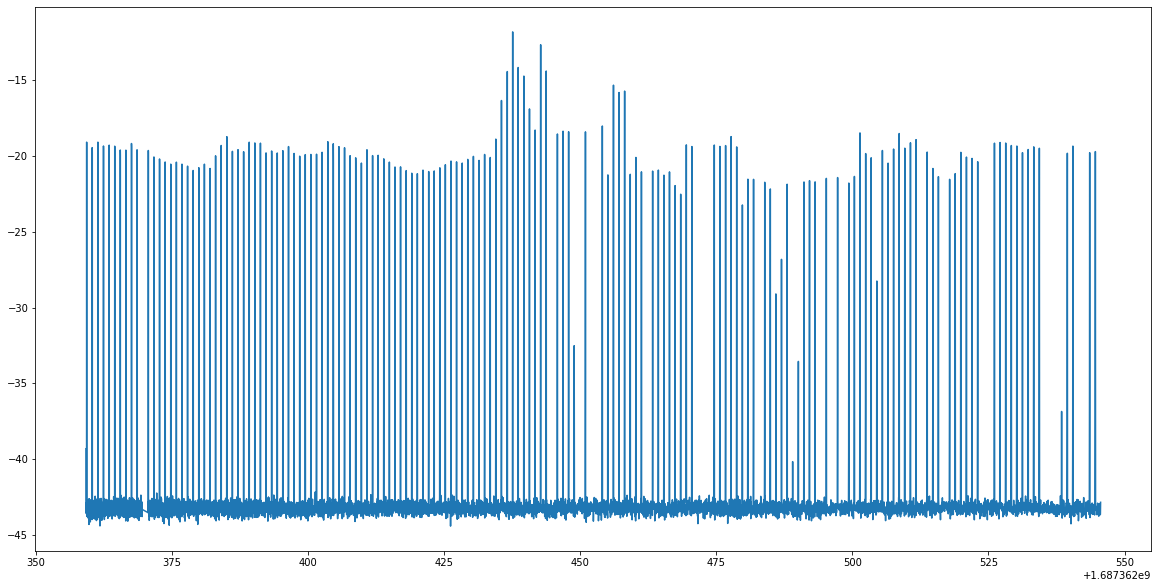

In [16]:
plt.figure(figsize=(20,10))
plt.plot(results_list[0], results_list[1])

In [9]:
f = open("rssi.csv", "a")
for i in range(len(results_list[0])):
    f.writelines(str(results_list[0][i])+", "+str(results_list[1][i])+"\n")
f.close()

#open and read the file after the appending:
f = open("rssi.csv", "r")
print(f.read())

1687359975.672425, -39.443590312965235
1687359975.675832, -39.36530806544
1687359975.679136, -43.049705675476005
1687359975.682237, -43.440121583607834
1687359975.6873841, -43.18102968625518
1687359975.6908998, -43.011790860216486
1687359975.693991, -43.128634870181514
1687359975.6974761, -43.05005808266217
1687359975.700203, -43.31989135832942
1687359975.702822, -43.36269548340119
1687359975.705442, -43.28453016321147
1687359975.708134, -43.08622859470272
1687359975.710672, -43.33910800102319
1687359975.7146938, -43.07878641675796
1687359975.7173991, -43.0679297165839
1687359975.720051, -42.87306821866874
1687359975.722794, -43.21941154394196
1687359975.725452, -43.167050514905625
1687359975.728064, -43.453086767205846
1687359975.731028, -42.827272996408595
1687359975.7337441, -43.243656918470506
1687359975.736352, -42.58830969948014
1687359975.7388742, -43.36282694011273
1687359975.741614, -43.38568665987262
1687359975.744205, -43.04012759359348
1687359975.747308, -43.054819634896745

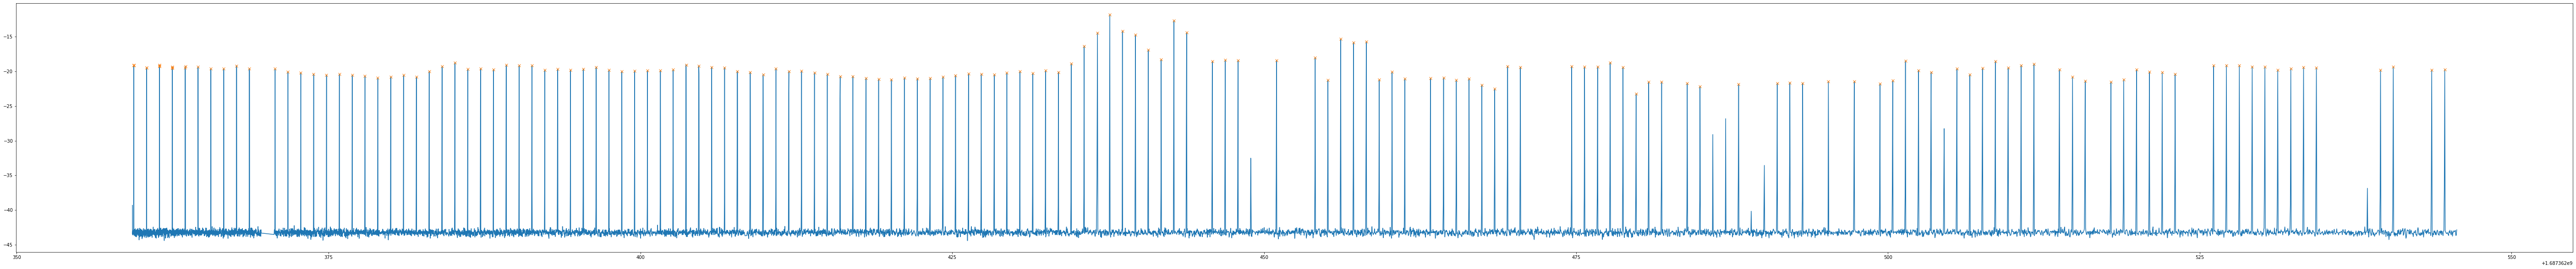

In [18]:
import scipy
peaks, _ = scipy.signal.find_peaks(results_list[1], height=-25)
plt.figure(figsize=(100,10))
plt.plot(results_list[0], results_list[1])
plt.plot([results_list[0][i] for i in peaks], [results_list[1][i] for i in peaks], "x")
